# Sprint 5. Análisis Estadístico

## ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

### Inicialización

In [91]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 


### Cargar datos

In [92]:
# Carga los archivos de datos en diferentes DataFrames

llamadas = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
planes = pd.read_csv('/datasets/megaline_plans.csv')
usuarios = pd.read_csv('/datasets/megaline_users.csv')



### Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [93]:
#Declaración de función

def tabla_info (tabla):
    #conversión de campos con fechas a Datetime
    for col in tabla.columns:
        if 'date' in col.lower():
            tabla[col] = pd.to_datetime(tabla[col])
            
    print('INFORMACIÓN DE TABLA')
    print(tabla.info())
    print()
    
    print('SECCIÓN DE VALORES NULOS')
    nulos = tabla.isna().sum()
    print(nulos)
    print()
    
    print('SECCIÓN DE VALORES DUPLICADOS')
    duplicados = tabla.duplicated().sum()
    print(duplicados)

In [94]:
#Análisis para tabla llamadas
tabla_info(llamadas)

INFORMACIÓN DE TABLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None

SECCIÓN DE VALORES NULOS
id           0
user_id      0
call_date    0
duration     0
dtype: int64

SECCIÓN DE VALORES DUPLICADOS
0


In [95]:
#Análisis para tabla internet
tabla_info(internet)

INFORMACIÓN DE TABLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None

SECCIÓN DE VALORES NULOS
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

SECCIÓN DE VALORES DUPLICADOS
0


In [96]:
tabla_info(mensajes)

INFORMACIÓN DE TABLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None

SECCIÓN DE VALORES NULOS
id              0
user_id         0
message_date    0
dtype: int64

SECCIÓN DE VALORES DUPLICADOS
0


In [97]:
tabla_info(planes)

INFORMACIÓN DE TABLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

SECCIÓN DE VALORES NULOS
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

SECCIÓN DE VALORES DUPLICADOS
0

In [98]:
tabla_info(usuarios)

INFORMACIÓN DE TABLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None

SECCIÓN DE VALORES NULOS
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

SECCIÓN DE VALORES DUPLICADOS
0


**Conclusión 1.3**

Se llevó a cabo una limpieza inicial, la cual incluye la detección y manejo de valores nulos y duplicados. Además, se realiza la conversión de los campos de fecha al tipo de dato datetime para facilitar su posterior análisis temporal, como la extracción del mes.

### Tarifas

In [99]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [100]:
# Imprime una muestra de los datos para las tarifas

planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Necesitamos la conversión de MB a GB para homogeneizar nuestros datos a GB.**

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [101]:
#Podemos almacenar los valores de int64 a int32  y float64 a float32 para optimizar el uso de memoria.
def optimize_dataframe(df):    
    # Convertir columnas enteras (int64) a int32 si los valores son suficientemente pequeños
    for col in df.select_dtypes(include=['int64']).columns:
        if df[col].max() < 2**31:  # Asegurarse de que los valores caben en int32
            df[col] = df[col].astype('int32')

    # Convertir columnas de punto flotante (float64) a float32
    for col in df.select_dtypes(include=['float64']).columns:
        #no validamos el maximo como en int debido a que para float nos basamos en la precisión,
        #que requiere nuestro campo, en este caso nuestros decimales no superan los  7 decimales para tener int 64.
        df[col] = df[col].astype('float32')            

In [102]:
optimize_dataframe(planes)

In [103]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int32  
 1   mb_per_month_included  2 non-null      int32  
 2   minutes_included       2 non-null      int32  
 3   usd_monthly_pay        2 non-null      int32  
 4   usd_per_gb             2 non-null      int32  
 5   usd_per_message        2 non-null      float32
 6   usd_per_minute         2 non-null      float32
 7   plan_name              2 non-null      object 
dtypes: float32(2), int32(5), object(1)
memory usage: 200.0+ bytes


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [104]:
#Creación de función para convertir MB a GB
def mb_to_gb (mb):
    result = mb/1024
    return result

In [105]:
#Creación de campo de gb incluidos en plan
planes['gb_per_month_included'] = planes['mb_per_month_included'].apply(mb_to_gb)

In [106]:
#ordenamiento de columnas para tener GB y MB juntos 
planes = planes[['plan_name', 'messages_included', 'mb_per_month_included', 'gb_per_month_included', 'minutes_included', 
         'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']]

In [107]:
planes

,plan_name,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01


### Usuarios/as

In [108]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [109]:
# Imprime una muestra de datos para usuarios

usuarios.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Para valores NaT en "churn" podemos dejarlo como valor nulo o podemos poner una fecha hipotética.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [110]:
#se llenan los NaT con una fecha hipotética
usuarios['churn_date'] = usuarios['churn_date'].fillna('3000-01-01')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [111]:
#Creación de campo de mes
usuarios['month'] = usuarios['reg_date'].dt.month

In [112]:
#Verificación
usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,3000-01-01,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,3000-01-01,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,3000-01-01,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,3000-01-01,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,3000-01-01,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,3000-01-01,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,3000-01-01,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,3000-01-01,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,3000-01-01,2


### Llamadas

In [113]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [114]:
# Imprime una muestra de datos para las llamadas

llamadas.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Hay que redondear los minutos de las llamadas para saber cuantos minutos completos se van a cobrar**.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [115]:
#creación de función para redondeo en minutos de llamadas
def llamadas_redondeadas (min):
    result = np.ceil(min)
    return result

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [116]:
#Creación de nuevo campo redondeado
llamadas['duration_ceil'] = llamadas['duration'].apply(llamadas_redondeadas)

In [117]:
#Creación de campo de mes
llamadas['month'] = llamadas['call_date'].dt.month

In [118]:
#verificación de nuevo campo 'duration_ceil'
llamadas

,id,user_id,call_date,duration,duration_ceil,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


### Mensajes

In [119]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [120]:
# Imprime una muestra de datos para los mensajes
mensajes.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Cada registro pertenece a un mensaje que envio el cliente, por lo que podemos esperar que el user_id se vea duplicado.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [121]:
#Optimización de dtypes para no utilizar más memoria de la necesaria
optimize_dataframe(mensajes)

In [122]:
#Verificación
mensajes.dtypes

id                      object
user_id                  int32
message_date    datetime64[ns]
dtype: object

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [123]:
#Creación de campo mes
mensajes['month']= mensajes['message_date'].dt.month

In [124]:
#verificación
mensajes

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [125]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [126]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Hay que convertir MB en GB para homogeneizar nuestra unidades.**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [127]:
##Optimización de dtypes para no utilizar más memoria de la necesaria
optimize_dataframe(internet)

In [128]:
#Verificación
internet.dtypes

id                      object
user_id                  int32
session_date    datetime64[ns]
mb_used                float32
dtype: object

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [129]:
#Creación de nuevo campo gb_used
internet['gb_used'] = internet['mb_used'].apply(mb_to_gb)
#Creación de nuevo campo month
internet['month'] = internet['session_date'].dt.month
#Redondeo con ceil
internet['gb_used'] = np.ceil(internet['gb_used'])
#

In [130]:
#Verificación
internet

,id,user_id,session_date,mb_used,gb_used,month
0,1000_13,1000,2018-12-29,89.860001,1.0,12
1,1000_204,1000,2018-12-31,0.000000,0.0,12
2,1000_379,1000,2018-12-28,660.400024,1.0,12
3,1000_413,1000,2018-12-26,270.989990,1.0,12
4,1000_442,1000,2018-12-27,880.219971,1.0,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.059998,1.0,10
104821,1499_216,1499,2018-12-30,304.720001,1.0,12
104822,1499_217,1499,2018-09-22,292.750000,1.0,9
104823,1499_218,1499,2018-12-07,0.000000,0.0,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [131]:
#Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
#Cambio de nombres de las columnas
planes.rename(columns={
                       'messages_included': 'mensajes_incluidos',
                       'gb_per_month_included':'gb_incluidos',
                       'mb_per_month_included': 'mb_incluidos_al_mes',
                       'minutes_included': 'minutos_incluidos',
                       'usd_monthly_pay': 'usd_pago_por_mes',
                       'usd_per_gb': 'usd_por_gb',
                       'usd_per_message': 'usd_por_mensaje',
                       'usd_per_minute': 'usd_por_minuto',
                       'plan_name': 'plan'
                      }, inplace=True)


In [132]:
#Verificación
planes

,plan,mensajes_incluidos,mb_incluidos_al_mes,gb_incluidos,minutos_incluidos,usd_pago_por_mes,usd_por_gb,usd_por_mensaje,usd_por_minuto
0,surf,50,15360,15.0,500,20,10,0.03,0.03
1,ultimate,1000,30720,30.0,3000,70,7,0.01,0.01


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [133]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas


,id,user_id,call_date,duration,duration_ceil,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0,11
137731,1499_200,1499,2018-10-20,10.89,11.0,10
137732,1499_201,1499,2018-09-21,8.12,9.0,9
137733,1499_202,1499,2018-10-10,0.37,1.0,10


In [134]:
#Creación de tabla dinámica
int_llamadas=llamadas.pivot_table(index = ['user_id','month'], values='id',aggfunc= 'count')

In [135]:
#Incorporación de index como columnas 
int_llamadas = int_llamadas.reset_index()
#cambio de nombre en id 
int_llamadas = int_llamadas.rename(columns ={'id':'calls'})

In [136]:
#verificación
int_llamadas

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [137]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
int_minutos=llamadas.pivot_table(index = ['user_id','month'], values='duration',aggfunc= 'sum')
#Traer los índices como columnas
int_minutos = int_minutos.reset_index()
# Renombrar columna 'duration'
int_minutos=int_minutos.rename(columns={'duration':'minutes_used'})
#Verificación
int_minutos

,user_id,month,minutes_used
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [138]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
int_mensajes = mensajes.pivot_table(index = ['user_id','month'], values='id',aggfunc= 'count')
#Traer los índices como columnas
int_mensajes = int_mensajes.reset_index()
# Renombrar columna 'duration'
int_mensajes= int_mensajes.rename(columns={'id':'messages_send'})
#Verificación
int_mensajes

,user_id,month,messages_send
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [139]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
int_internet = internet.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')
#Traer los índices como columnas
int_internet = int_internet.reset_index()
#Verificación
int_internet

,user_id,month,gb_used
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [140]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#Unión llamadas yminutos
int_lla_min = int_llamadas.merge(int_minutos, on = ['user_id','month'], how = 'outer')
#Unión llamadas-minutos + mensajes
int_lla_min_men = int_lla_min.merge(int_mensajes, on = ['user_id','month'], how = 'outer')
#Unión llamadas-minutos-mensajes + internet
int_consumo_sin_plan = int_lla_min_men.merge(int_internet, on = ['user_id','month'], how = 'outer')

In [141]:
#verificación
int_consumo_sin_plan

,user_id,month,calls,minutes_used,messages_send,gb_used
0,1000,12,16.0,116.83,11.0,4.0
1,1001,8,27.0,171.14,30.0,21.0
2,1001,9,49.0,297.69,44.0,41.0
3,1001,10,65.0,374.11,53.0,50.0
4,1001,11,64.0,404.59,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,27.0
2289,1361,5,NaN,NaN,2.0,7.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,2.0


In [142]:
# Añade la información de la tarifa
int_consumo_con_plan = int_consumo_sin_plan.merge(usuarios[['user_id','plan','city']], on = 'user_id', how = 'outer')


In [143]:
#Verificación
int_consumo_con_plan

,user_id,month,calls,minutes_used,messages_send,gb_used,plan,city
0,1000,12.0,16.0,116.83,11.0,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,27.0,171.14,30.0,21.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,49.0,297.69,44.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,65.0,374.11,53.0,50.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,64.0,404.59,36.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [144]:
# Calcula el ingreso mensual para cada usuario

#Merge con tabla de planes para calcular ingreso
fct_consumo =int_consumo_con_plan.merge(planes,on ='plan',how = 'inner')

#llenar los valores NaN con 
fct_consumo =fct_consumo.fillna(0)

#Cambio de algunos valores float enteros a int
fct_consumo [['month','calls','messages_send','gb_used', 'gb_incluidos']] = fct_consumo [['month','calls','messages_send','gb_used', 'gb_incluidos']].astype(int)

#cambio de nombres de columnas a español

fct_consumo = fct_consumo.rename(columns = {'month':'mes',
                                            'calls':'llamadas_hechas',
                                            'minutes_used':'minutos_usados',
                                            'messages_send':'mensajes_enviados',
                                            'gb_used':'gb_usados',
                                            'city':'ciudad'})
#verificación
fct_consumo


,user_id,mes,llamadas_hechas,minutos_usados,mensajes_enviados,gb_usados,plan,ciudad,mensajes_incluidos,mb_incluidos_al_mes,gb_incluidos,minutos_incluidos,usd_pago_por_mes,usd_por_gb,usd_por_mensaje,usd_por_minuto
0,1000,12,16,116.83,11,4,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,30,3000,70,7,0.01,0.01
1,1006,11,2,9.32,15,7,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,30,3000,70,7,0.01,0.01
2,1006,12,9,54.79,139,62,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,30,3000,70,7,0.01,0.01
3,1008,10,71,450.21,21,48,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,30,3000,70,7,0.01,0.01
4,1008,11,63,422.81,37,56,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,30,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0,0,0.00,0,0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,15,500,20,10,0.03,0.03
2299,1307,0,0,0.00,0,0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,15,500,20,10,0.03,0.03
2300,1319,0,0,0.00,0,0,surf,"Colorado Springs, CO MSA",50,15360,15,500,20,10,0.03,0.03
2301,1378,0,0,0.00,0,0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,15,500,20,10,0.03,0.03


**Creación de funciones para calcular las cantidades extra por cobrar.**

In [145]:
#función para el extra consumido en llamadas
def minutos_cobrables (fila):
    min_usados = fila['minutos_usados']
    min_incluidos = fila['minutos_incluidos']
    extra_consumido = 0
    
    if min_usados > min_incluidos:
        extra_consumido = min_usados - min_incluidos
    return extra_consumido

In [146]:
#función para el extra consumido en mensajes
def mensajes_cobrables (fila):
    men_usados = fila['mensajes_enviados']
    men_incluidos = fila['mensajes_incluidos']
    extra_consumido = 0
    
    if men_usados > men_incluidos:
        extra_consumido = men_usados - men_incluidos
    return extra_consumido

In [147]:
#función para el extra consumido en internet
def internet_cobrable (fila):
    int_usados = fila['gb_usados']
    int_incluidos = fila['gb_incluidos']
    extra_consumido = 0
    
    if int_usados > int_incluidos:
        extra_consumido = int_usados - int_incluidos
    return extra_consumido

In [148]:
#Creación de nuevo campo minutos cobrables
fct_consumo['minutos_cobrables'] = fct_consumo.apply(minutos_cobrables, axis= 1)

#Creación de nuevo campo mensajes cobrables
fct_consumo['mensajes_cobrables'] = fct_consumo.apply(mensajes_cobrables, axis= 1)

#Creación de nuevo campo mensajes cobrables
fct_consumo['internet_cobrable'] = fct_consumo.apply(internet_cobrable, axis= 1)


In [149]:
fct_consumo

,user_id,mes,llamadas_hechas,minutos_usados,mensajes_enviados,gb_usados,plan,ciudad,mensajes_incluidos,mb_incluidos_al_mes,gb_incluidos,minutos_incluidos,usd_pago_por_mes,usd_por_gb,usd_por_mensaje,usd_por_minuto,minutos_cobrables,mensajes_cobrables,internet_cobrable
0,1000,12,16,116.83,11,4,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,0
1,1006,11,2,9.32,15,7,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,0
2,1006,12,9,54.79,139,62,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,32
3,1008,10,71,450.21,21,48,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,18
4,1008,11,63,422.81,37,56,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0,0,0.00,0,0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0
2299,1307,0,0,0.00,0,0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0
2300,1319,0,0,0.00,0,0,surf,"Colorado Springs, CO MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0
2301,1378,0,0,0.00,0,0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0


**Creación de función de rentabilidad.**

In [150]:
def rentabilidad_calculo (fila):
    #variables de extras
    extra_llamada = fila['minutos_cobrables']
    extra_mensajes = fila['mensajes_cobrables']
    extra_internet = fila['internet_cobrable']
    #variables de costos extra
    costo_extra_llamada = fila ['usd_por_minuto']
    costo_extra_mensajes = fila ['usd_por_mensaje']
    costo_extra_internet = fila ['usd_por_gb']
    #variable del costo del plan
    costo_plan = fila['usd_pago_por_mes'] 
   #variable que calcula el valor total de la venta 
    rentabilidad = costo_plan +  (extra_llamada *costo_extra_llamada) + (extra_mensajes * costo_extra_mensajes) + (extra_internet * costo_extra_internet)
    
    return rentabilidad

In [151]:
#Cración de campo rentabilidad
fct_consumo['rentabilidad'] = fct_consumo.apply(rentabilidad_calculo, axis = 1)

In [152]:
#Verificación
fct_consumo

,user_id,mes,llamadas_hechas,minutos_usados,mensajes_enviados,gb_usados,plan,ciudad,mensajes_incluidos,mb_incluidos_al_mes,gb_incluidos,minutos_incluidos,usd_pago_por_mes,usd_por_gb,usd_por_mensaje,usd_por_minuto,minutos_cobrables,mensajes_cobrables,internet_cobrable,rentabilidad
0,1000,12,16,116.83,11,4,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,0,70.0
1,1006,11,2,9.32,15,7,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,0,70.0
2,1006,12,9,54.79,139,62,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,32,294.0
3,1008,10,71,450.21,21,48,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,18,196.0
4,1008,11,63,422.81,37,56,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,30,3000,70,7,0.01,0.01,0.0,0,26,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0,0,0.00,0,0,surf,"Cincinnati, OH-KY-IN MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0,20.0
2299,1307,0,0,0.00,0,0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0,20.0
2300,1319,0,0,0.00,0,0,surf,"Colorado Springs, CO MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0,20.0
2301,1378,0,0,0.00,0,0,surf,"Denver-Aurora-Lakewood, CO MSA",50,15360,15,500,20,10,0.03,0.03,0.0,0,0,20.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [153]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

In [179]:
# Paso 1: Calcular el promedio de minutos usados agrupando por plan y mes
minutos_avg = fct_consumo.pivot_table(index=['mes','plan'], values='minutos_usados', aggfunc='mean').reset_index()
minutos_avg['minutos_usados'] = np.ceil(minutos_avg['minutos_usados']).astype('int32')
minutos_avg = minutos_avg.rename(columns = {'minutos_usados':'minutos_promedio'})
#Agrupar por plan surf
surf_llamadas = minutos_avg.query("plan == 'surf'")

#Agrupar por plan ultimate
ultimate_llamadas = minutos_avg.query("plan == 'ultimate'")

In [180]:
minutos_avg

,mes,plan,minutos_promedio
0,0,surf,0
1,0,ultimate,0
2,1,surf,193
3,1,ultimate,184
4,2,surf,281
5,2,ultimate,380
6,3,surf,311
7,3,ultimate,286
8,4,surf,333
9,4,ultimate,317


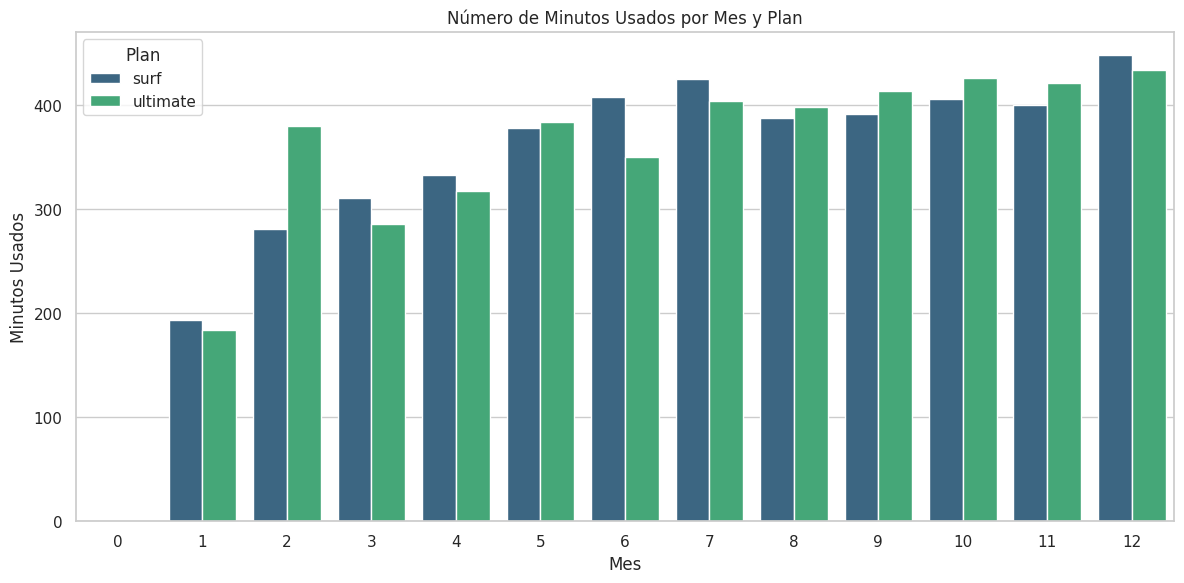

In [181]:
# Crear la figura y los ejes para los histogramas
# Configurar el estilo visual
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=minutos_avg, x='mes', y='minutos_promedio', hue='plan', palette='viridis')

# Añadir títulos y etiquetas
plt.title('Número de Minutos Usados por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Minutos Usados')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo con este gráfico! Has logrado una visualización clara y bien estructurada que facilita la comparación del uso de GB entre los planes Surf y Ultimate a lo largo de los meses. La elección de un gráfico de barras y la inclusión de una leyenda bien posicionada permiten una rápida interpretación de los datos y destacan las diferencias entre ambos planes. ¡Continúa utilizando este tipo de visualizaciones para comunicar tus resultados de forma efectiva!

</div>

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [182]:
# Calcula la media y la varianza de la duración mensual de llamadas.


#SURF 

#avg de minutos para surf plan
surf_mean = surf_llamadas['minutos_promedio'].mean()
#var de minutos para surf plan
surf_var = surf_llamadas['minutos_promedio'].var()
print('\033[1m' + 'PLAN SURF' + '\033[0m')
print(f'La media de minutos que las personas hablan en el plan surf es: {surf_mean}')
print(f'La varianza de los minutos que las personas hablan en el plan surf es:{surf_var}')
print()


#ULTIMATE

print('\033[1m' + 'PLAN ULTIMATE' + '\033[0m')
#avg de minutos para ultimate plan
ultimate_mean = ultimate_llamadas['minutos_promedio'].mean()
#var de minutos para ultimate plan
ultimate_var = ultimate_llamadas['minutos_promedio'].var()
print(f'La media de minutos que las personas hablan en el plan ultimate es: {ultimate_mean}')
print(f'La varianza de los minutos que las personas hablan en el plan ultimate es:{ultimate_var}')

PLAN SURF
La media de minutos que las personas hablan en el plan surf es: 335.53846153846155
La varianza de los minutos que las personas hablan en el plan surf es:14928.269230769229

PLAN ULTIMATE
La media de minutos que las personas hablan en el plan ultimate es: 338.3076923076923
La varianza de los minutos que las personas hablan en el plan ultimate es:15225.730769230768


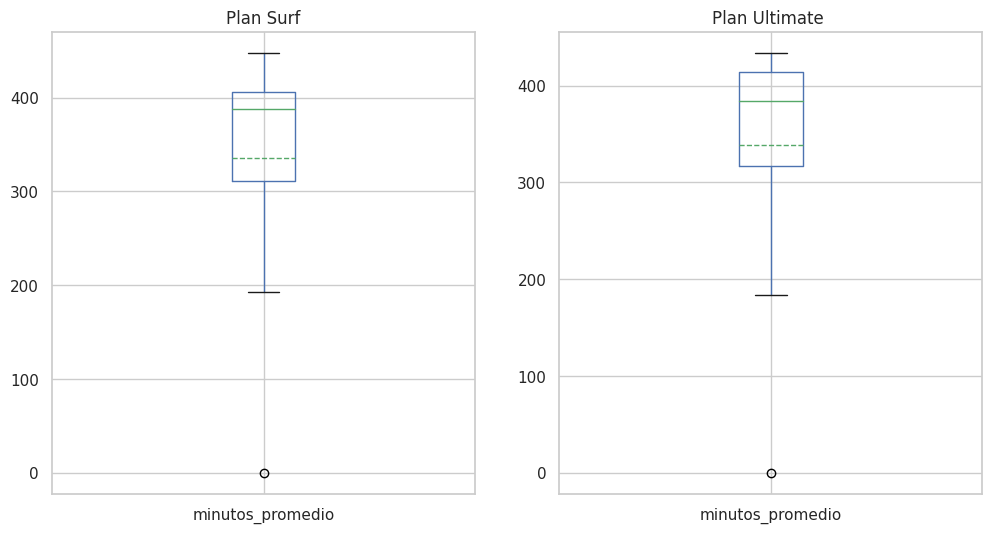

In [183]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

surf_llamadas['minutos_promedio'].plot(
figsize = (12,6),
kind = 'box',
title = 'Plan Surf',
ax = axes[0],
showmeans = True,
meanline = True
)

ultimate_llamadas['minutos_promedio'].plot(
figsize = (12,6),
kind = 'box',
title = 'Plan Ultimate ',
ax = axes [1],
showmeans = True,
meanline = True

)

# Mostrar el gráfico 
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


**Su comportamiento es muy similar en medias, sin embargo el plan ultimate tiene una muestra mas dispersa; al observar el gráfico de boxplot, podemos identificar que en ambos planes tenemos usuarios que nunca han realizado llamadas.**

### Mensajes

In [160]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_avg = fct_consumo.pivot_table(index=['mes','plan'], values='mensajes_enviados', aggfunc='sum').reset_index()
#Agrupar por plan surf
surf_sms = mensajes_avg.query("plan == 'surf'")
#Agrupar por plan ultimate
ultimate_sms = mensajes_avg.query("plan == 'ultimate'")

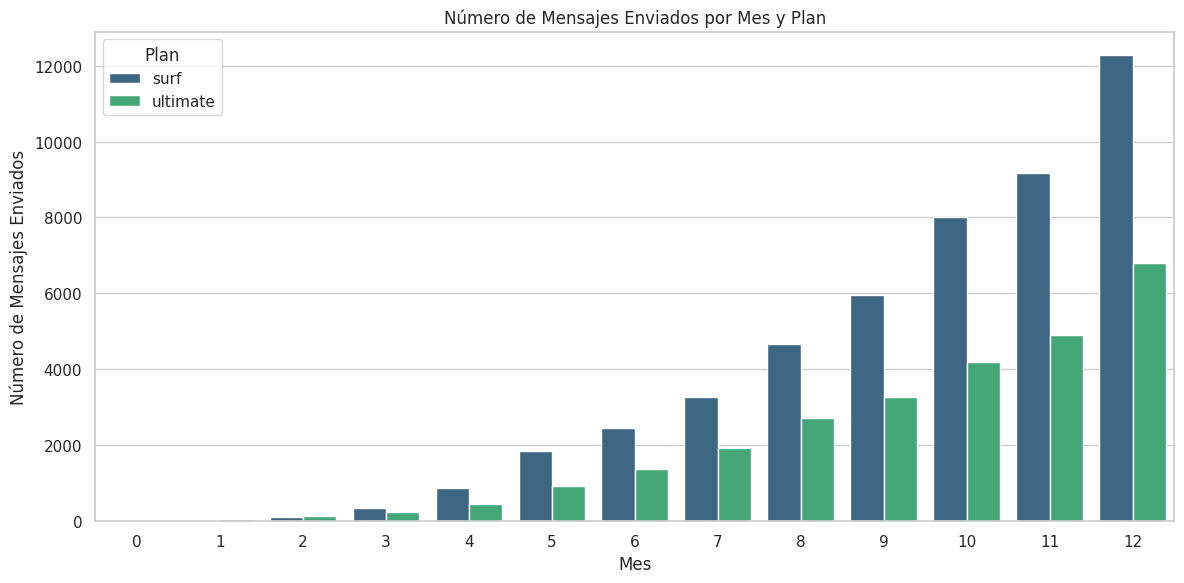

In [172]:
# Configurar el estilo visual
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=mensajes_avg, x='mes', y='mensajes_enviados', hue='plan', palette='viridis')

# Añadir títulos y etiquetas
plt.title('Número de Mensajes Enviados por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número de Mensajes Enviados')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [171]:
# Calcula la media y la varianza de los mensajes enviados.

#SURF 

#avg de mensajes para surf plan
surf_mean_sms = surf_sms['mensajes_enviados'].mean()
#var de mensajes para surf plan
surf_var_sms = surf_sms['mensajes_enviados'].var()
print('\033[1m' + 'PLAN SURF' + '\033[0m')
print(f'La media de los mensajes enviados en el plan surf es: {surf_mean_sms}')
print(f'La varianza de los mensajes enviados en el plan surf es:{surf_var_sms}')
print()


#ULTIMATE

print('\033[1m' + 'PLAN ULTIMATE' + '\033[0m')
#avg de mensajes para ultimate plan
ultimate_mean_sms = ultimate_sms['mensajes_enviados'].mean()
#var de mensajes para ultimate plan
ultimate_var_sms = ultimate_sms['mensajes_enviados'].var()
print(f'La media de los mensajes enviados en el plan ultimate es: {ultimate_mean_sms}')
print(f'La varianza de los mensajes enviados en el plan ultimate es:{ultimate_var_sms}')

PLAN SURF
La media de los mensajes enviados en el plan surf es: 3770.3076923076924
La varianza de los mensajes enviados en el plan surf es:16048268.397435896

PLAN ULTIMATE
La media de los mensajes enviados en el plan ultimate es: 2079.769230769231
La varianza de los mensajes enviados en el plan ultimate es:4698367.025641026


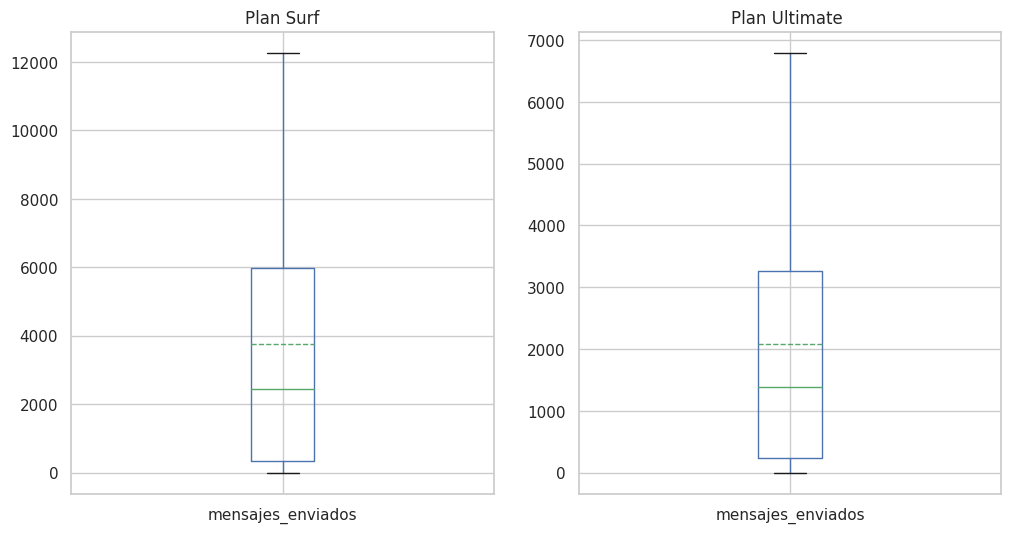

In [170]:
# Traza un diagrama de caja para visualizar la distribución de mensajes enviados por plan

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

surf_sms['mensajes_enviados'].plot(
figsize = (12,6),
kind = 'box',
title = 'Plan Surf',
ax = axes[0],
showmeans = True,
meanline = True

)

ultimate_sms['mensajes_enviados'].plot(
figsize = (12,6),
kind = 'box',
title = 'Plan Ultimate ',
ax = axes [1],
showmeans = True,
meanline = True

)

# Mostrar el gráfico 
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Los usuarios del plan Surf tienden a enviar una mayor cantidad de mensajes, lo que se evidencia tanto en el gráfico de barras como en la comparación de las medias. Además, este plan muestra una mayor dispersión en los datos, lo que indica que existe una variabilidad considerable en el comportamiento de los usuarios, con algunos enviando muy pocos mensajes y otros enviando una cantidad significativamente mayor, en comparación con el plan Ultimate, que presenta una distribución más concentrada.**

### Internet

In [164]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

In [165]:
# Comprara el número de GB usados que tienden a enviar cada mes los usuarios de cada plan
internet_sum = fct_consumo.pivot_table(index=['mes','plan'], values='gb_usados', aggfunc='sum').reset_index()
#Agrupar por plan surf
surf_inter = internet_sum.query("plan == 'surf'")
#Agrupar por plan ultimate
ultimate_inter = internet_sum.query("plan == 'ultimate'")

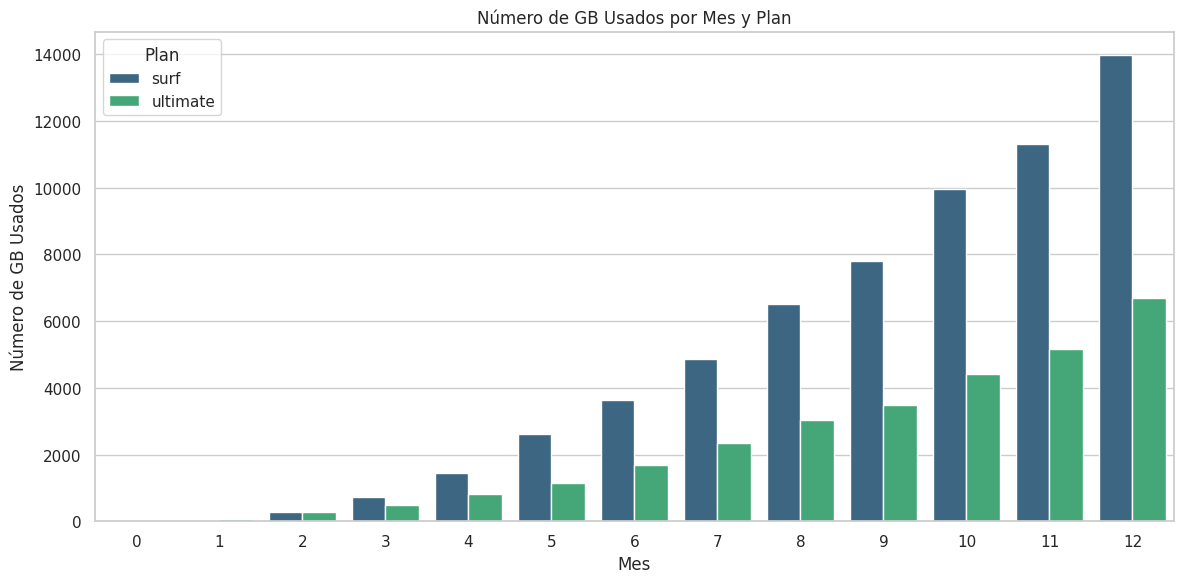

In [167]:
# Configurar el estilo visual
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=internet_sum, x='mes', y='gb_usados', hue='plan', palette='viridis')

# Añadir títulos y etiquetas
plt.title('Número de GB Usados por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número de GB Usados')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [169]:
# Calcula la media y la varianza de los GB usados.


#SURF 

#avg de los GB usados para surf plan
surf_mean_inter = surf_inter['gb_usados'].mean()
#var delos GB usados para surf plan
surf_var_inter = surf_inter['gb_usados'].var()
print('\033[1m' + 'PLAN SURF' + '\033[0m')
print(f'La media de los GB usados para el plan surf es de: {surf_mean_inter}')
print(f'La varianza de los GB usados para el plan surf es de:{surf_var_inter}')
print()


#ULTIMATE

print('\033[1m' + 'PLAN ULTIMATE' + '\033[0m')
#avg de los GB usados para ultimate plan
ultimate_mean_inter = ultimate_inter['gb_usados'].mean()
#var de los GB usados para ultimate plan
ultimate_var_inter = ultimate_inter['gb_usados'].var()
print(f'La media de los GB usados para el plan ultimate es de: {ultimate_mean_inter}')
print(f'La varianza de los GB usados para el plan ultimate es de:{ultimate_var_inter}')

PLAN SURF
La media de los GB usados para el plan surf es de: 4857.0
La varianza de los GB usados para el plan surf es de:22121180.0

PLAN ULTIMATE
La media de los GB usados para el plan ultimate es de: 2275.230769230769
La varianza de los GB usados para el plan ultimate es de:4634412.025641025


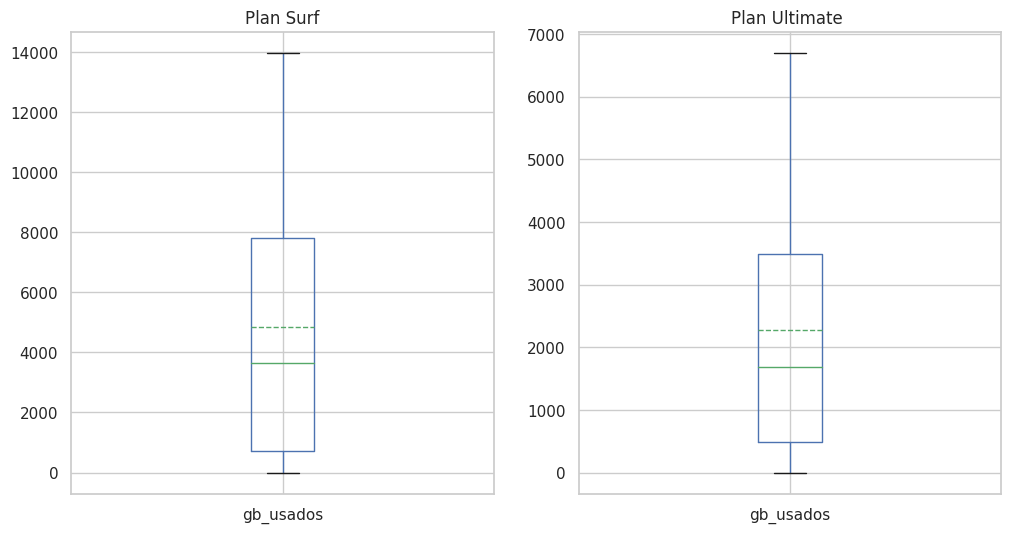

In [168]:
# Traza un diagrama de caja para visualizar la distribución de GB usados por plan

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

surf_inter['gb_usados'].plot(
figsize = (12,6),
kind = 'box',
title = 'Plan Surf',
ax = axes[0],
showmeans = True,
meanline = True
)

ultimate_inter['gb_usados'].plot(
figsize = (12,6),
kind = 'box',
title = 'Plan Ultimate ',
ax = axes [1],
showmeans = True,
meanline = True

)

# Mostrar el gráfico 
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Los usuarios del plan Surf tienen un mayor consumo de GB a lo largo de los meses; de igual manera, su consumo promedio es mayor que el del plan Ultimate y presenta una mayor dispersión como se observa en el boxplot.**

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [ ]:
#rentabilidad plan surf
rentabilidad_avg_surf=fct_consumo.query("plan == 'surf'")['rentabilidad'].mean()
#verificación
print(f"La rentabilidad promedio del plan surf en el 2018 fue de: ${np.round(rentabilidad_avg_surf, 2)}USD por usuario")


In [ ]:
#rentabilidad plan ultimate
rentabilidad_avg_ultimate=fct_consumo.query("plan == 'ultimate'")['rentabilidad'].mean()
#verificación
print(f"La rentabilidad promedio del plan ultimate en el 2018 fue de: ${np.round(rentabilidad_avg_ultimate, 2)}USD por usuario")

In [ ]:
#¿Cuántos usuarios hay en los distintos planes?

In [ ]:
#surf
usuarios_surf = fct_consumo[fct_consumo['plan'] == 'surf']['user_id'].count()
print(f'Hay {usuarios_surf} usuarios en el plan surf.' )

In [ ]:
#ultimate
usuarios_ultimate = fct_consumo[fct_consumo['plan'] == 'ultimate']['user_id'].count()
print(f'Hay {usuarios_ultimate} usuarios en el plan ultimate.' )

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Aunque el plan Ultimate es más caro, cuenta con un menor número de usuarios. En los gráficos de boxplot, observamos que más usuarios superan su consumo permitido, lo cual incrementa el costo de su plan debido a los cargos adicionales. Sin embargo, esto es solo una hipótesis; para darle validez, realizaremos una prueba estadística.**

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Prueba las hipótesis**


**H0 = La media de la rentabilidad de surf plan < media de la rentabilidad de ultimate plan.**

**H1 =  La media de la rentabilidad de surf plan > media de la rentabilidad de ultimate plan.**


**JUSTIFICACIÓN DE USO DE PRUEBA T-TEST PARA DOS MUESTRAS INDEPENDIENTES**


Se utilizó la prueba t-test de Student para muestras independientes porque se busca comparar si existe una diferencia significativa entre las medias de rentabilidad de los planes "surf" y "ultimate", los cuales representan dos grupos distintos. Además, no se asumió igualdad de varianzas entre los grupos (parámetro equal_var=False), dado que sus características podrían ser diferentes. Este análisis es apropiado para datos numéricos y continuos, como la rentabilidad, y el nivel de significancia (α=0.05) permite evaluar con un 95% de confianza si las diferencias observadas son estadísticamente significativas.

In [ ]:
#varibales
ventas_surf = fct_consumo.query("plan == 'surf'")['rentabilidad']
ventas_ultimate = fct_consumo.query("plan == 'ultimate'")['rentabilidad']

#ttest para muestras independientes con varianzas diferentes
resultados_prueba_ventas = st.ttest_ind(ventas_surf,ventas_ultimate, equal_var = False)
#valor alpha (sensibilidad)
alpha = 0.05

In [ ]:
resultados_prueba_ventas.pvalue

In [ ]:
#Impresión de resultados

if resultados_prueba_ventas.pvalue < alpha:
    print('Podemos rechazar hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')

**Aceptamos H1: Surf es mas rentable que ultimate.**

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

**Declaración de hipótesis**

**H1 = La media de la rentabilidad del área de NY-NJ es diferente a las otras regiones.**

**H0 = La media de la rentabilidad del área de NY-NJ es igual a las otras regiones.**


In [ ]:
# Prueba las hipótesis

residentes_ny_nj = fct_consumo.query('ciudad=="New York-Newark-Jersey City, NY-NJ-PA MSA"')['rentabilidad']

residentes_otros = fct_consumo[~(fct_consumo['ciudad'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA')]['rentabilidad']

#Prueba t para muestras independientes y con varianzas diferentes 
resultado_ingreso_por_zonas = st.ttest_ind(residentes_ny_nj,residentes_otros, equal_var = False)

#Significancia 
alpha = 0.05 

#Impresión de resultados
if resultado_ingreso_por_zonas.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

**Aceptamos H1: los usarios de NY-NJ proveen un ingreso medio diferente al de otras regiones.** 

-----

## Conclusión general

Este proyecto consistió en la aplicación de limpieza de datos, así como la ingeniería de características para generar nuevas variables a partir de datos existentes. Se emplearon métodos estadísticos para analizar el comportamiento de los usuarios en diferentes planes, utilizando medidas de tendencia central, dispersión, visualizaciones y pruebas  para comparar dos muestras independientes con varianzas distintas.

Además, es importante destacar el uso del submódulo stats de scipy para la validación de hipótesis, especialmente en la evaluación de la rentabilidad de los planes, lo cual permite fundamentar las conclusiones con rigor estadístico. Esto minimiza el sesgo y respalda una toma de decisiones objetiva y basada en evidencia científica. 

----